In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [71]:
df = pd.read_pickle("strong_data_final.pickle")

In [72]:
df.head()

,doc_index,article_index,content,title,time,author,articles_no_author,from,author_identity,author_enroll_time,word_sentence_list,seg
0,"""1""",10,"""有一檔利安越南基金喔可以試試看""","""Re: 有人投資過越南基金嗎?""",2011-01-01 22:34:00,"""8d8d""","""725""",NaN,"""天使人""","""2010-12-10 09:48""","["", 有, 一, 檔, 利安, 越南, 基金, 喔, 可以, 試試, 看, ""]","["", 檔, 利安, 越南, 基金, 喔, 試試, ""]"
1,"""2""",10,"""利安越南基金可以在先鋒投顧的平台上買到但只有新幣計價的選擇而且績效很差 大盤漲 基金不見得...","""Re: 有人投資過越南基金嗎?""",2011-01-01 22:37:00,"""fundhot""","""7483""","""我是強大""","""管理員""","""2010-12-10 09:47""","["", 利安, 越南, 基金, 可以, 在, 先鋒, 投顧, 的, 平台, 上, 買到, 但...","["", 利安, 越南, 基金, 先鋒, 投顧, 平台, 買到, 新幣, 計價, 選擇, 績效..."
2,"""3""",11,"""如果出口的力道逐漸復甦科技股應該還是會是重頭戲吧""","""Re: 今年的台股基金投資方向""",2011-01-03 16:14:00,"""king""","""964""",NaN,"""天使人""","""2010-12-10 09:37""","["", 如果, 出口, 的, 力道, 逐漸, 復甦, 科技股, 應該, 還是, 會, 是, ...","["", 出口, 力道, 逐漸, 復甦, 科技股, 應該, 會, 重頭戲, ""]"
3,"""4""",11,"""發問的大大能否請問你傳產賺到錢的是哪一檔基金阿?另請問強基金大大推薦統一大滿貫/群益葛萊美...","""Re: 今年的台股基金投資方向""",2011-01-03 16:27:00,"""ryoma""","""634""",NaN,"""名人堂成員 兼 分版版主""","""2011-01-03 16:18""","["", 發問, 的, 大大, 能否, 請問, 你, 傳產, 賺到, 錢, 的, 是, 哪, ...","["", 發問, 大大, 請問, 傳產, 賺到, 錢, 檔, 基金, 請問, 強, 基金, 大..."
4,"""5""",11,"""@chenyu今年強基金很看好台股上萬點推升力道來自國外的熱錢炒作的題材當然就是ECFA連...","""Re: 今年的台股基金投資方向""",2011-01-03 17:47:00,"""fundhot""","""7483""","""我是強大""","""管理員""","""2010-12-10 09:47""","[""@chenyu, 今年, 強, 基金, 很, 看好, 台股, 上萬, 點, 推升, 力道...","[""@chenyu, 今年, 強, 基金, 看好, 台股, 上萬, 點, 推升, 力道, 國..."


# 分析日期

In [73]:
df['time'] = pd.to_datetime(df.time)

In [74]:
df["date"] = df['time'].apply(lambda x:x.date())

# 去除STR標號

In [75]:
df = df.drop("doc_index", axis=1)
df

,article_index,content,title,time,author,articles_no_author,from,author_identity,author_enroll_time,word_sentence_list,seg,date
0,10,"""有一檔利安越南基金喔可以試試看""","""Re: 有人投資過越南基金嗎?""",2011-01-01 22:34:00,"""8d8d""","""725""",NaN,"""天使人""","""2010-12-10 09:48""","["", 有, 一, 檔, 利安, 越南, 基金, 喔, 可以, 試試, 看, ""]","["", 檔, 利安, 越南, 基金, 喔, 試試, ""]",2011-01-01
1,10,"""利安越南基金可以在先鋒投顧的平台上買到但只有新幣計價的選擇而且績效很差 大盤漲 基金不見得...","""Re: 有人投資過越南基金嗎?""",2011-01-01 22:37:00,"""fundhot""","""7483""","""我是強大""","""管理員""","""2010-12-10 09:47""","["", 利安, 越南, 基金, 可以, 在, 先鋒, 投顧, 的, 平台, 上, 買到, 但...","["", 利安, 越南, 基金, 先鋒, 投顧, 平台, 買到, 新幣, 計價, 選擇, 績效...",2011-01-01
2,11,"""如果出口的力道逐漸復甦科技股應該還是會是重頭戲吧""","""Re: 今年的台股基金投資方向""",2011-01-03 16:14:00,"""king""","""964""",NaN,"""天使人""","""2010-12-10 09:37""","["", 如果, 出口, 的, 力道, 逐漸, 復甦, 科技股, 應該, 還是, 會, 是, ...","["", 出口, 力道, 逐漸, 復甦, 科技股, 應該, 會, 重頭戲, ""]",2011-01-03
3,11,"""發問的大大能否請問你傳產賺到錢的是哪一檔基金阿?另請問強基金大大推薦統一大滿貫/群益葛萊美...","""Re: 今年的台股基金投資方向""",2011-01-03 16:27:00,"""ryoma""","""634""",NaN,"""名人堂成員 兼 分版版主""","""2011-01-03 16:18""","["", 發問, 的, 大大, 能否, 請問, 你, 傳產, 賺到, 錢, 的, 是, 哪, ...","["", 發問, 大大, 請問, 傳產, 賺到, 錢, 檔, 基金, 請問, 強, 基金, 大...",2011-01-03
4,11,"""@chenyu今年強基金很看好台股上萬點推升力道來自國外的熱錢炒作的題材當然就是ECFA連...","""Re: 今年的台股基金投資方向""",2011-01-03 17:47:00,"""fundhot""","""7483""","""我是強大""","""管理員""","""2010-12-10 09:47""","[""@chenyu, 今年, 強, 基金, 很, 看好, 台股, 上萬, 點, 推升, 力道...","[""@chenyu, 今年, 強, 基金, 看好, 台股, 上萬, 點, 推升, 力道, 國...",2011-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...
54981,8139,"""@@? 4月份反彈不少, 小人持有南非幣計價的,都漲回正值, 連剛買的復華短收都有賺....","""Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...""",2020-05-08 23:34:00,"""michelle""","""82""",NaN,"""註冊會員""","""2017-04-06 12:04""","[""@@? , 4月份, 反彈, 不少, ,, , 小人, 持有, 南非幣, 計價, ...","[""@@? , 4月份, 反彈, 不少, , 小人, 持有, 南非幣, 計價, 漲回,...",2020-05-08
54982,8139,"""南非幣真的很兇猛的哦，雖然配息很爽，但最好要有當成本金大幅虧損的心理準備""","""Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...""",2020-05-09 02:29:00,"""莫大華""","""104""",NaN,"""註冊會員""","""2017-09-26 10:01""","["", 南非幣, 真的, 很, 兇猛, 的, 哦, ，, 雖然, 配息, 很, 爽, ，, ...","["", 南非幣, 真的, 兇猛, 配息, 爽, 最好, 當成, 本金, 大幅, 虧損, 心理...",2020-05-09
54983,8139,"""這是我買的南非幣基金要怎麼配置比較好呢我現在是要買股基還是債基呢謝謝""","""Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...""",2020-05-09 10:38:00,"""sly72927""","""5""",NaN,"""註冊會員""","""2020-04-09 11:36""","["", 這, 是, 我, 買, 的, 南非幣, 基金, 要, 怎麼, 配置, 比較, 好, ...","["", 買, 南非幣, 基金, 配置, 比較, 現在, 買, 股基, 債基, 謝謝, ""]",2020-05-09
54984,8139,"""部分原因應該是匯損造成另外所述基金蠻複雜的，蕭碧燕老師有說要了解自己買的基金，蠻有道理的""","""Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...""",2020-05-09 11:20:00,"""yangyensan""","""87""",NaN,"""註冊會員""","""2019-04-09 16:44""","["", 部分, 原因, 應該, 是, 匯損, 造成, 另外, 所, 述, 基金, 蠻, 複雜...","["", 部分, 原因, 應該, 匯損, 造成, 述, 基金, 蠻, 複雜, 蕭碧燕, 老師,...",2020-05-09


In [90]:
df.content = df.content.apply(lambda x:x.strip('"'))
df.author = df.author.apply(lambda x:x.strip('"'))
df.title = df.title.apply(lambda x:str(x).strip('"'))
# df.articles_no_author = df.articles_no_author.apply(lambda x:int(str(x).strip('"')) 
df.author_identity = df.author_identity.apply(lambda x:x.strip('"'))
# df.author_enroll_time = df.author_enroll_time.apply(lambda x:x.strip('"'))

In [91]:
df

,article_index,content,title,time,author,articles_no_author,from,author_identity,author_enroll_time,word_sentence_list,seg,date
0,10,有一檔利安越南基金喔可以試試看,Re: 有人投資過越南基金嗎?,2011-01-01 22:34:00,8d8d,"""725""",NaN,天使人,"""2010-12-10 09:48""","["", 有, 一, 檔, 利安, 越南, 基金, 喔, 可以, 試試, 看, ""]","["", 檔, 利安, 越南, 基金, 喔, 試試, ""]",2011-01-01
1,10,利安越南基金可以在先鋒投顧的平台上買到但只有新幣計價的選擇而且績效很差 大盤漲 基金不見得會...,Re: 有人投資過越南基金嗎?,2011-01-01 22:37:00,fundhot,"""7483""","""我是強大""",管理員,"""2010-12-10 09:47""","["", 利安, 越南, 基金, 可以, 在, 先鋒, 投顧, 的, 平台, 上, 買到, 但...","["", 利安, 越南, 基金, 先鋒, 投顧, 平台, 買到, 新幣, 計價, 選擇, 績效...",2011-01-01
2,11,如果出口的力道逐漸復甦科技股應該還是會是重頭戲吧,Re: 今年的台股基金投資方向,2011-01-03 16:14:00,king,"""964""",NaN,天使人,"""2010-12-10 09:37""","["", 如果, 出口, 的, 力道, 逐漸, 復甦, 科技股, 應該, 還是, 會, 是, ...","["", 出口, 力道, 逐漸, 復甦, 科技股, 應該, 會, 重頭戲, ""]",2011-01-03
3,11,發問的大大能否請問你傳產賺到錢的是哪一檔基金阿?另請問強基金大大推薦統一大滿貫/群益葛萊美/...,Re: 今年的台股基金投資方向,2011-01-03 16:27:00,ryoma,"""634""",NaN,名人堂成員 兼 分版版主,"""2011-01-03 16:18""","["", 發問, 的, 大大, 能否, 請問, 你, 傳產, 賺到, 錢, 的, 是, 哪, ...","["", 發問, 大大, 請問, 傳產, 賺到, 錢, 檔, 基金, 請問, 強, 基金, 大...",2011-01-03
4,11,@chenyu今年強基金很看好台股上萬點推升力道來自國外的熱錢炒作的題材當然就是ECFA連香...,Re: 今年的台股基金投資方向,2011-01-03 17:47:00,fundhot,"""7483""","""我是強大""",管理員,"""2010-12-10 09:47""","[""@chenyu, 今年, 強, 基金, 很, 看好, 台股, 上萬, 點, 推升, 力道...","[""@chenyu, 今年, 強, 基金, 看好, 台股, 上萬, 點, 推升, 力道, 國...",2011-01-03
...,...,...,...,...,...,...,...,...,...,...,...,...
54981,8139,"@@? 4月份反彈不少, 小人持有南非幣計價的,都漲回正值, 連剛買的復華短收都有賺.當...",Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...,2020-05-08 23:34:00,michelle,"""82""",NaN,註冊會員,"""2017-04-06 12:04""","[""@@? , 4月份, 反彈, 不少, ,, , 小人, 持有, 南非幣, 計價, ...","[""@@? , 4月份, 反彈, 不少, , 小人, 持有, 南非幣, 計價, 漲回,...",2020-05-08
54982,8139,南非幣真的很兇猛的哦，雖然配息很爽，但最好要有當成本金大幅虧損的心理準備,Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...,2020-05-09 02:29:00,莫大華,"""104""",NaN,註冊會員,"""2017-09-26 10:01""","["", 南非幣, 真的, 很, 兇猛, 的, 哦, ，, 雖然, 配息, 很, 爽, ，, ...","["", 南非幣, 真的, 兇猛, 配息, 爽, 最好, 當成, 本金, 大幅, 虧損, 心理...",2020-05-09
54983,8139,這是我買的南非幣基金要怎麼配置比較好呢我現在是要買股基還是債基呢謝謝,Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...,2020-05-09 10:38:00,sly72927,"""5""",NaN,註冊會員,"""2020-04-09 11:36""","["", 這, 是, 我, 買, 的, 南非幣, 基金, 要, 怎麼, 配置, 比較, 好, ...","["", 買, 南非幣, 基金, 配置, 比較, 現在, 買, 股基, 債基, 謝謝, ""]",2020-05-09
54984,8139,部分原因應該是匯損造成另外所述基金蠻複雜的，蕭碧燕老師有說要了解自己買的基金，蠻有道理的,Re: 四月後轉換南非幣基金，但都是漲不太起來或虧損...,2020-05-09 11:20:00,yangyensan,"""87""",NaN,註冊會員,"""2019-04-09 16:44""","["", 部分, 原因, 應該, 是, 匯損, 造成, 另外, 所, 述, 基金, 蠻, 複雜...","["", 部分, 原因, 應該, 匯損, 造成, 述, 基金, 蠻, 複雜, 蕭碧燕, 老師,...",2020-05-09


In [92]:
df.to_pickle("strong_data_finaltidy.pickle")

# EDA

In [93]:
df = pd.read_pickle("strong_data_finaltidy.pickle")

In [95]:
len(df.groupby("article_index"))
#5204篇文章

5204

In [99]:
#找KOL
kol_seris = df.groupby("author").count()['time'].sort_values(ascending=False)[:12]
kol_seris

author
fundhot       5740
ronccf        3520
Ivy           2036
mrchildren    1998
我是布魯斯         1876
chicky        1526
yelindream    1478
luslus        1265
jack1234       808
simonks        782
熱狗熱GO          779
baonamy        745
Name: time, dtype: int64

In [100]:
kol_seris.index

Index(['fundhot', 'ronccf', 'Ivy', 'mrchildren', '我是布魯斯', 'chicky',
       'yelindream', 'luslus', 'jack1234', 'simonks', '熱狗熱GO', 'baonamy'],
      dtype='object', name='author')

In [107]:
res = pd.DataFrame()

for i in kol_seris.index:
    res=res.append(
    df[df['author']==i].iloc[0]
    )

In [104]:
df[df['author']=="我是布魯斯"].iloc[0]

article_index                                                       761
content               若論2018-10最低點起算到之後最高點，現貨從718~1,923，不只100% ...尤其...
title                                       Re: 如果看好黃金價格，該投資實體黃金而非黃金基金。
time                                                2020-02-23 22:06:00
author                                                            我是布魯斯
articles_no_author                                               "2113"
from                                                         "火星的超級衝動派"
author_identity                                                   名人堂成員
author_enroll_time                                   "2017-05-30 13:37"
word_sentence_list    [", 若論, 2018, -, 10, 最, 低點, 起算, 到, 之後, 最高點, ，,...
seg                   [", 若論, 2018, -, 10, 低點, 起算, 之後, 最高點, 現貨, 718,...
date                                                         2020-02-23
Name: 9217, dtype: object

In [108]:
res

,article_index,articles_no_author,author,author_enroll_time,author_identity,content,date,from,seg,time,title,word_sentence_list
1,10.0,"""7483""",fundhot,"""2010-12-10 09:47""",管理員,利安越南基金可以在先鋒投顧的平台上買到但只有新幣計價的選擇而且績效很差 大盤漲 基金不見得會...,2011-01-01,"""我是強大""","["", 利安, 越南, 基金, 先鋒, 投顧, 平台, 買到, 新幣, 計價, 選擇, 績效...",2011-01-01 22:37:00,Re: 有人投資過越南基金嗎?,"["", 利安, 越南, 基金, 可以, 在, 先鋒, 投顧, 的, 平台, 上, 買到, 但..."
11,11.0,"""4068""",ronccf,"""2011-01-04 01:12""",名人堂成員,這個可能要請百科天王L大來說說,2012-05-09,NaN,"["", 可能, 請, 百科天王, L, 說說, ""]",2012-05-09 11:17:00,Re: 今年的台股基金投資方向,"["", 這, 個, 可能, 要, 請, 百科天王, L, 大, 來, 說說, ""]"
1803,177.0,"""2373""",Ivy,"""2012-10-08 19:52""",名人堂成員,"意外發現討論匯率文章,也意外發現這個4月份利率表如果大大在渣打往來金額達100萬(等值台幣)...",2012-10-24,NaN,"["", 意外, 發現, 討論, 匯率, 文章, 意外, 發現, 4月份, 利率表, 大大, ...",2012-10-24 22:00:00,Re: 關於匯率避險,"["", 意外, 發現, 討論, 匯率, 文章, ,, 也, 意外, 發現, 這, 個, 4月..."
1884,177.0,"""2503""",mrchildren,"""2012-11-28 19:38""",名人堂成員,唉，我的澳幣債券基金才剛被燙到，至今尚未復原，看來接下來南非幣基金也凶多吉少。。。,2013-05-30,"""媒體說的理財狂人M大...摟洗襪 (已哭)""","["", 澳幣, 債券, 基金, 剛, 燙到, 尚未, 復原, 看來, 接下來, 南非幣, 基...",2013-05-30 22:52:00,Re: 關於匯率避險,"["", 唉, ，, 我, 的, 澳幣, 債券, 基金, 才, 剛, 被, 燙到, ，, 至今..."
9217,761.0,"""2113""",我是布魯斯,"""2017-05-30 13:37""",名人堂成員,"若論2018-10最低點起算到之後最高點，現貨從718~1,923，不只100% ...尤其...",2020-02-23,"""火星的超級衝動派""","["", 若論, 2018, -, 10, 低點, 起算, 之後, 最高點, 現貨, 718,...",2020-02-23 22:06:00,Re: 如果看好黃金價格，該投資實體黃金而非黃金基金。,"["", 若論, 2018, -, 10, 最, 低點, 起算, 到, 之後, 最高點, ，,..."
1586,177.0,"""3490""",chicky,"""2011-06-13 13:02""",名人堂成員,買進4筆美元。,2012-01-11,"""欣賞蒙格的平凡人""","["", 買進, 筆, 美元, ""]",2012-01-11 11:06:00,Re: 關於匯率避險,"["", 買進, 4, 筆, 美元, 。, ""]"
9,11.0,"""1709""",yelindream,"""2011-03-18 18:55""",名人堂成員,很久的主題了，拿來起個今年的頭.....話說今天看老婆投資的台股基金居然還有+10%(從今年...,2012-05-08,NaN,"["", 久, 主題, 拿來, 今年, 頭, ., ., ., ., ., 話, 說, 今天,...",2012-05-08 18:05:00,Re: 今年的台股基金投資方向,"["", 很, 久, 的, 主題, 了, ，, 拿來, 起, 個, 今年, 的, 頭, ., ..."
13,11.0,"""1304""",luslus,"""2011-02-20 13:25""",註冊會員,"R大:小弟台股最陌生了,手中也無任何部位^^手中無股票,心中也無股價!",2012-05-09,NaN,"[""R, :, 小弟, 台股, 陌生, 手, 中, 部位, ^^, 手, 中, 股票, 心,...",2012-05-09 13:56:00,Re: 今年的台股基金投資方向,"[""R, 大, :, 小弟, 台股, 最, 陌生, 了, ,, 手, 中, 也, 無, 任何..."
24368,5037.0,"""878""",jack1234,"""2017-05-29 07:55""",註冊會員,簡單講其實這種無本投資法應該像賭而非實驗; 就是賭: 配息收益+本金耗損+匯率波動+利率波動...,2017-09-09,"""植物學院.佛學系的阿北""","["", 簡單, 講, 其實, 種, 投資法, 應該, 賭, 非, 實驗, ;, , 賭, ...",2017-09-09 08:14:00,Re: 【完整收錄】真人真事人體實驗：1年領100萬「0本金退休」實驗,"["", 簡單, 講, 其實, 這, 種, 無, 本, 投資法, 應該, 像, 賭, 而, 非..."
1944,177.0,"""960""",simonks,"""2013-02-24 21:01""",名人堂成員,感謝ivy姐回覆，若依匯率KD來看，中線準備看升，短線準備看貶，基於中線保護短線，等短線回檔...,2015-01-16,NaN,"["", 感謝, ivy, 姐, 回覆, 匯率, KD, 中線, 準備, 看升, 短線, 準備...",2015-01-16 10:11:00,Re: 關於匯率避險,"["", 感謝, ivy, 姐, 回覆, ，, 若, 依, 匯率, KD, 來, 看, ，, ..."


# 找名人堂成員

In [116]:
hall_of_fame = np.unique(df[df['author_identity']=="名人堂成員"].author)
hall_of_fame

array(['Ivy', 'allenlu', 'baonamy', 'chicky', 'mrchildren', 'ronccf',
       'simonks', 'yelindream', '我是布魯斯', '黃金白銀'], dtype=object)

In [118]:
hof = pd.DataFrame()

for i in hall_of_fame:
    hof=hof.append(
    df[df['author']==i].iloc[0]
    )
hof

,article_index,articles_no_author,author,author_enroll_time,author_identity,content,date,from,seg,time,title,word_sentence_list
1803,177.0,"""2373""",Ivy,"""2012-10-08 19:52""",名人堂成員,"意外發現討論匯率文章,也意外發現這個4月份利率表如果大大在渣打往來金額達100萬(等值台幣)...",2012-10-24,NaN,"["", 意外, 發現, 討論, 匯率, 文章, 意外, 發現, 4月份, 利率表, 大大, ...",2012-10-24 22:00:00,Re: 關於匯率避險,"["", 意外, 發現, 討論, 匯率, 文章, ,, 也, 意外, 發現, 這, 個, 4月..."
17269,1875.0,"""524""",allenlu,"""2017-07-20 06:12""",名人堂成員,"謝謝強大, 目前也學習觀察FBI中!",2017-12-04,NaN,"["", 謝謝, 強大, , 目前, 學習, 觀察, FBI, 中, !, ""]",2017-12-04 19:25:00,Re: 【新功能】指數 VS FBI：可看出「FBI多少時該買」及「過去買入後效果」,"["", 謝謝, 強大, ,, , 目前, 也, 學習, 觀察, FBI, 中, !, ""]"
220,30.0,"""823""",baonamy,"""2011-01-16 23:00""",名人堂成員,轉貼黃金王子：金價靠3大題材熱炒 防漲多回探1400美元鉅亨網記者陳慧琳 台北 2011-...,2011-04-22,NaN,"["", 轉貼, 黃金, 王子, 金價, 題材, 熱, 炒, , 防漲, 回探, 1400,...",2011-04-22 08:23:00,Re: 黃金,"["", 轉貼, 黃金, 王子, ：, 金價, 靠, 3, 大, 題材, 熱, 炒, , 防..."
1586,177.0,"""3490""",chicky,"""2011-06-13 13:02""",名人堂成員,買進4筆美元。,2012-01-11,"""欣賞蒙格的平凡人""","["", 買進, 筆, 美元, ""]",2012-01-11 11:06:00,Re: 關於匯率避險,"["", 買進, 4, 筆, 美元, 。, ""]"
1884,177.0,"""2503""",mrchildren,"""2012-11-28 19:38""",名人堂成員,唉，我的澳幣債券基金才剛被燙到，至今尚未復原，看來接下來南非幣基金也凶多吉少。。。,2013-05-30,"""媒體說的理財狂人M大...摟洗襪 (已哭)""","["", 澳幣, 債券, 基金, 剛, 燙到, 尚未, 復原, 看來, 接下來, 南非幣, 基...",2013-05-30 22:52:00,Re: 關於匯率避險,"["", 唉, ，, 我, 的, 澳幣, 債券, 基金, 才, 剛, 被, 燙到, ，, 至今..."
11,11.0,"""4068""",ronccf,"""2011-01-04 01:12""",名人堂成員,這個可能要請百科天王L大來說說,2012-05-09,NaN,"["", 可能, 請, 百科天王, L, 說說, ""]",2012-05-09 11:17:00,Re: 今年的台股基金投資方向,"["", 這, 個, 可能, 要, 請, 百科天王, L, 大, 來, 說說, ""]"
1944,177.0,"""960""",simonks,"""2013-02-24 21:01""",名人堂成員,感謝ivy姐回覆，若依匯率KD來看，中線準備看升，短線準備看貶，基於中線保護短線，等短線回檔...,2015-01-16,NaN,"["", 感謝, ivy, 姐, 回覆, 匯率, KD, 中線, 準備, 看升, 短線, 準備...",2015-01-16 10:11:00,Re: 關於匯率避險,"["", 感謝, ivy, 姐, 回覆, ，, 若, 依, 匯率, KD, 來, 看, ，, ..."
9,11.0,"""1709""",yelindream,"""2011-03-18 18:55""",名人堂成員,很久的主題了，拿來起個今年的頭.....話說今天看老婆投資的台股基金居然還有+10%(從今年...,2012-05-08,NaN,"["", 久, 主題, 拿來, 今年, 頭, ., ., ., ., ., 話, 說, 今天,...",2012-05-08 18:05:00,Re: 今年的台股基金投資方向,"["", 很, 久, 的, 主題, 了, ，, 拿來, 起, 個, 今年, 的, 頭, ., ..."
9217,761.0,"""2113""",我是布魯斯,"""2017-05-30 13:37""",名人堂成員,"若論2018-10最低點起算到之後最高點，現貨從718~1,923，不只100% ...尤其...",2020-02-23,"""火星的超級衝動派""","["", 若論, 2018, -, 10, 低點, 起算, 之後, 最高點, 現貨, 718,...",2020-02-23 22:06:00,Re: 如果看好黃金價格，該投資實體黃金而非黃金基金。,"["", 若論, 2018, -, 10, 最, 低點, 起算, 到, 之後, 最高點, ，,..."
27456,5522.0,"""41""",黃金白銀,"""2017-11-30 22:28""",名人堂成員,不要期待南非幣會漲到3年前的水準.....如果只賺14萬就怕....小朋友.回家乖乖上班吧....,2017-12-28,NaN,"["", 不要, 期待, 南非幣, 會, 漲到, 年, 前, 水準, ., ., ., ., ...",2017-12-28 23:20:00,Re: 南非幣配息基金大賺，是要賣出，還是要繼續以領利息為目的?,"["", 不要, 期待, 南非幣, 會, 漲到, 3, 年, 前, 的, 水準, ., ., ..."


In [122]:
admin = np.unique(df[df['author_identity']=="管理員"].author)
total_kol =list(hall_of_fame)+list(admin)
total_kol

['Ivy',
 'allenlu',
 'baonamy',
 'chicky',
 'mrchildren',
 'ronccf',
 'simonks',
 'yelindream',
 '我是布魯斯',
 '黃金白銀',
 'IHCAY45',
 'deven',
 'faith',
 'fundhot',
 '強編不站牆邊']

In [123]:
total = pd.DataFrame()

for i in total_kol:
    total=total.append(
    df[df['author']==i]
    )
total

,article_index,content,title,time,author,articles_no_author,from,author_identity,author_enroll_time,word_sentence_list,seg,date
1803,177,"意外發現討論匯率文章,也意外發現這個4月份利率表如果大大在渣打往來金額達100萬(等值台幣)...",Re: 關於匯率避險,2012-10-24 22:00:00,Ivy,"""2373""",NaN,名人堂成員,"""2012-10-08 19:52""","["", 意外, 發現, 討論, 匯率, 文章, ,, 也, 意外, 發現, 這, 個, 4月...","["", 意外, 發現, 討論, 匯率, 文章, 意外, 發現, 4月份, 利率表, 大大, ...",2012-10-24
1807,177,"看R大一直在分批賣歐元,害我看著手上的歐元也緊張起來了",Re: 關於匯率避險,2012-12-18 10:42:00,Ivy,"""2373""",NaN,名人堂成員,"""2012-10-08 19:52""","["", 看, R大, 一直, 在, 分批, 賣, 歐元, ,, 害, 我, 看, 著, 手,...","["", R大, 一直, 分批, 賣, 歐元, 害, 手, 歐元, 緊張, 起來, ""]",2012-12-18
1810,177,"我做加幣部位不多,會先算一下換成加幣後要做什麼我個人想的是可對做澳幣/紐幣/歐元,還可等著接...",Re: 關於匯率避險,2012-12-19 12:45:00,Ivy,"""2373""",NaN,名人堂成員,"""2012-10-08 19:52""","["", 我, 做, 加幣, 部位, 不, 多, ,, 會, 先, 算, 一下, 換成, 加幣...","["", 做, 加幣, 部位, 會, 先, 算, 一下, 換成, 加幣, 做, 個人, 想, ...",2012-12-19
1811,177,晚上11點看到EURCAD衝上1.3127了,Re: 關於匯率避險,2012-12-20 23:13:00,Ivy,"""2373""",NaN,名人堂成員,"""2012-10-08 19:52""","["", 晚上, 11點, 看到, EURCAD, 衝上, 1.3127, 了, ""]","["", 晚上, 11點, 看到, EURCAD, 衝上, 1.3127, ""]",2012-12-20
1812,177,"連續兩次EURCAD 1.31都只發生在夜盤...由於手上還有一些加幣,成本接近,暫不考慮在...",Re: 關於匯率避險,2012-12-21 13:23:00,Ivy,"""2373""",NaN,名人堂成員,"""2012-10-08 19:52""","["", 連續, 兩, 次, EURCAD , 1.31, 都, 只, 發生, 在, 夜盤, ...","["", 連續, 兩, 次, EURCAD , 1.31, 發生, 夜盤, ., ., ., ...",2012-12-21
...,...,...,...,...,...,...,...,...,...,...,...,...
53759,8034,感謝大大的建議，跟捐助機構有關的發文，已經從下面這個主題分出來，集合成現在看到的這一篇囉～房...,Re: 投資賺錢記得回報社會！強友捐助機構有哪些？,2020-04-06 20:58:00,強編不站牆邊,"""311""",NaN,管理員,"""2017-10-17 07:36""","["", 感謝, 大大, 的, 建議, ，, 跟, 捐助, 機構, 有關, 的, 發文, ，,...","["", 感謝, 大大, 建議, 捐助, 機構, 發文, 已經, 下面, 主題, 分出來, 集...",2020-04-06
53814,8035,謝謝8大懂我，一券在手抄底好用，而且又是強友獨享的優惠，一定要手刀快搶喔#已經開戶跟還沒開戶...,Re: 能源基金從-50%變成正報酬！腰斬套牢還能解套的逆轉勝經驗分享,2020-04-07 14:04:00,強編不站牆邊,"""311""",NaN,管理員,"""2017-10-17 07:36""","["", 謝謝, 8, 大, 懂, 我, ，, 一, 券, 在, 手抄, 底, 好用, ，, ...","["", 謝謝, 懂, 券, 手抄, 底, 好用, 強友, 獨享, 優惠, 一定, 手刀, 快...",2020-04-07
54113,8063,這個很可以唷！歡迎強友兩邊拿兩頭賺優惠喔！,Re: 【強友獨家】富蘭克林開戶獨享單筆0+2筆定期定額24次0手續費，已開過戶也有優惠！,2020-04-19 21:26:00,強編不站牆邊,"""311""",NaN,管理員,"""2017-10-17 07:36""","["", 這, 個, 很, 可以, 唷, ！, 歡迎, 強友, 兩, 邊, 拿, 兩, 頭, ...","["", 唷, 歡迎, 強友, 兩, 兩, 頭, 賺, 優惠, 喔, ""]",2020-04-19
54357,8085,強編手腳很快，馬上讓這檔基金上線囉～～～荷寶環球消費新趨勢股票基金M美元https://fu...,Re: 建議強基金100新增「荷寶環球消費新趨勢股票基金」,2020-04-21 19:01:00,強編不站牆邊,"""311""",NaN,管理員,"""2017-10-17 07:36""","["", 強編, 手腳, 很, 快, ，, 馬上, 讓, 這, 檔, 基金, 上線, 囉, ～...","["", 強編, 手腳, 快, 馬上, 檔, 基金, 上線, 囉, ～～～, 荷寶, 環球, ...",2020-04-21


# 發文頻率

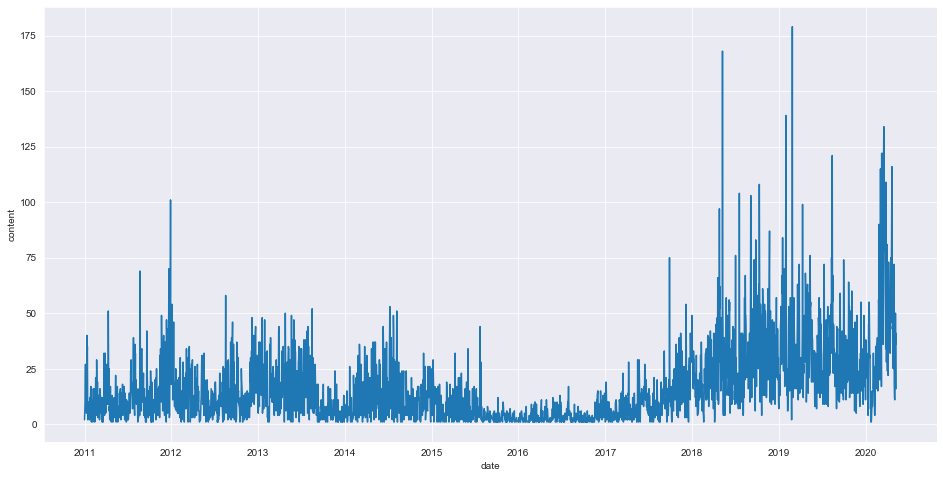

In [133]:
#論壇總數
plotdata = df.groupby("date").count()['content']

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=plotdata.index, y=plotdata)

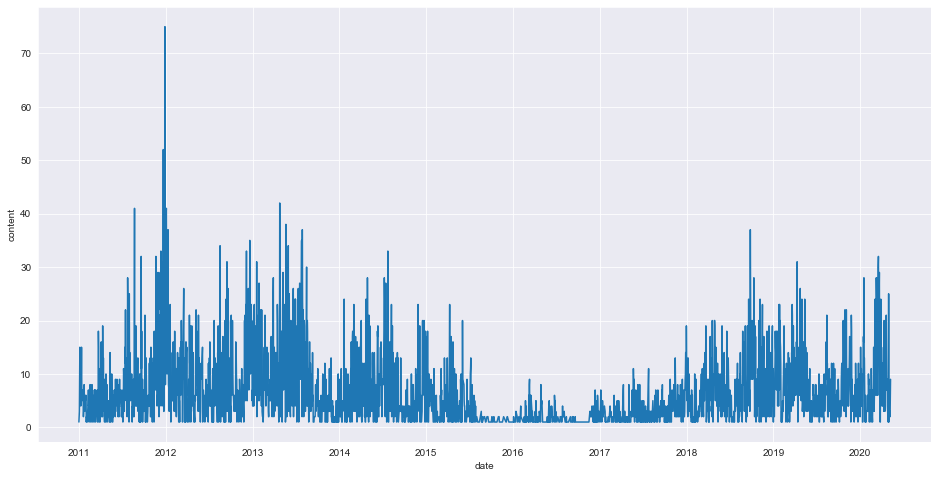

In [134]:
# 名人堂
plotdata1 = total.groupby("date").count()['content']

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=plotdata1.index, y=plotdata1)

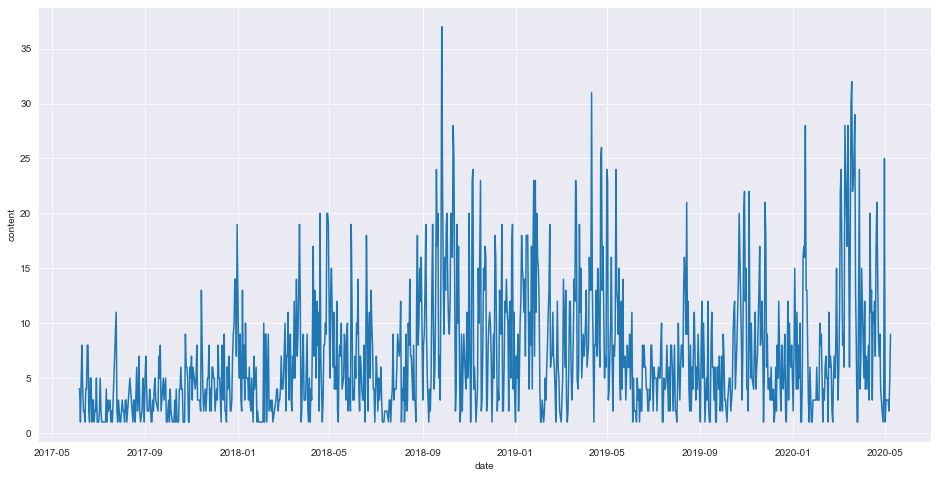

In [136]:
# 近三年
plotdata2 = total.groupby("date").count()['content'][-1000:]

sns.set_style('darkgrid')
fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x=plotdata2.index, y=plotdata2)

In [138]:
plotdata2

date
2017-06-06    4
2017-06-07    4
2017-06-08    1
2017-06-09    5
2017-06-10    8
             ..
2020-05-03    3
2020-05-05    3
2020-05-06    2
2020-05-07    5
2020-05-08    9
Name: content, Length: 1000, dtype: int64

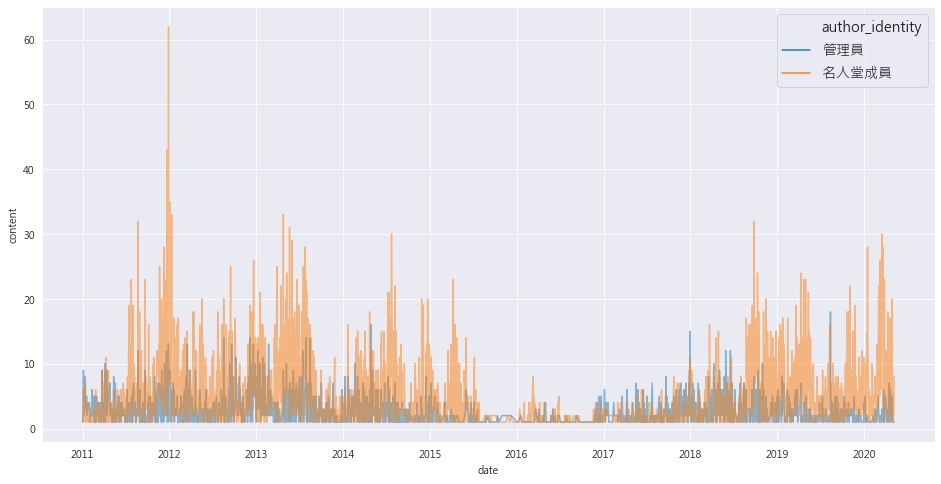

In [181]:
# 分類
total1=total.copy()
plotdata3 = total1.groupby(["date","author_identity"]).count()['content'].reset_index()
plotdata3=plotdata3[plotdata3.author_identity!=""]

sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x="date", y="content", hue="author_identity", data=plotdata3, alpha=0.5)
ax.legend(fontsize=14)
plt.show()

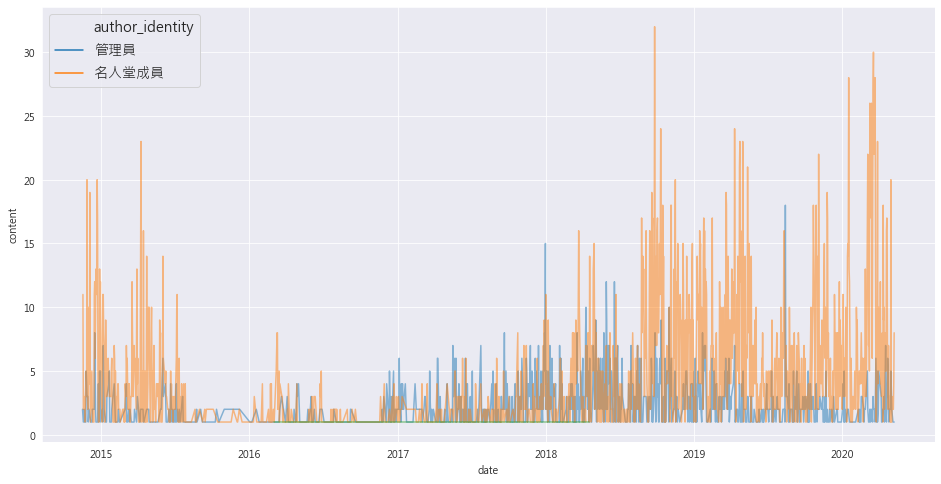

In [184]:
# 近三年
total1=total.copy()
plotdata3 = total1.groupby(["date","author_identity"]).count()['content'].reset_index()[-2402:]
#-1799
sns.set_style("darkgrid",{"font.sans-serif":['Microsoft JhengHei']})

fig, ax = plt.subplots(figsize=(16,8))
sns.lineplot(x="date", y="content", hue="author_identity", data=plotdata3, alpha=0.5)
ax.legend(fontsize=14)
plt.show()

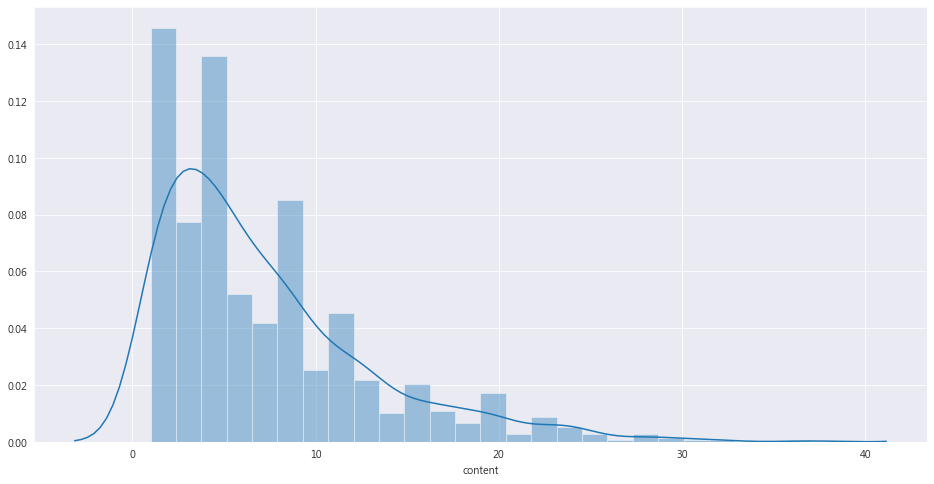

In [177]:
# dist
fig, ax = plt.subplots(figsize=(16,8))
sns.distplot(plotdata2)


# 找關鍵詞